# Feature Engineering and Preprocessing
This notebook covers the feature engineering steps applied to the dataset, including encoding categorical variables, feature scaling, dimensionality reduction, and outlier handling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 200)


# Load the dataset
file_path = "CW1_train.csv"
df = pd.read_csv(file_path)

# Display basic information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  10000 non-null  float64
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   price    10000 non-null  int64  
 8   x        10000 non-null  float64
 9   y        10000 non-null  float64
 10  z        10000 non-null  float64
 11  a1       10000 non-null  float64
 12  a2       10000 non-null  float64
 13  a3       10000 non-null  float64
 14  a4       10000 non-null  float64
 15  a5       10000 non-null  float64
 16  b1       10000 non-null  float64
 17  b2       10000 non-null  float64
 18  b3       10000 non-null  float64
 19  b4       10000 non-null  float64
 20  b5       10000 non-null  float64
 21  a6       1000

(None,
      outcome  carat        cut color clarity  depth  table  price     x     y  \
 0 -26.701232   1.14      Ideal     G     VS1   62.3   56.0   7948  6.73  6.70   
 1   6.548093   0.38    Premium     H     VS2   60.5   59.0    898  4.69  4.66   
 2   6.612562   0.50  Very Good     E     SI1   60.7   58.0   1351  5.09  5.13   
 3  -5.073562   0.70    Premium     D     SI1   61.2   58.0   2512  5.74  5.70   
 4 -14.436557   0.83      Ideal     G     SI2   62.4   54.0   2751  6.01  6.08   
 
       z        a1        a2        a3        a4        a5        b1        b2  \
 0  4.18  0.709585  0.385796  0.267058  0.500222  0.462145  0.806922  0.891912   
 1  2.83  0.649532  0.037578  0.618528  0.052079  0.008600  0.496153  0.092878   
 2  3.10  0.550496  0.029469  0.350697  0.131802  0.317685  0.821415  0.581294   
 3  3.50  0.982447  0.487176  0.339991  0.232601  0.267207  0.800913  0.984788   
 4  3.77  0.030877  0.818540  0.955872  0.923147  0.861377  0.997349  0.091662   
 
     

## Outliers

Outliers detected at positions: (array([  13,   19,   19,   23,   35,   38,   56,   61,  106,  118,  118,
        124,  138,  146,  175,  189,  221,  221,  222,  227,  227,  247,
        254,  261,  271,  284,  290,  308,  308,  309,  320,  323,  348,
        361,  383,  397,  416,  424,  448,  448,  481,  486,  496,  504,
        504,  521,  522,  535,  538,  576,  577,  582,  651,  655,  657,
        661,  661,  661,  670,  672,  683,  717,  724,  726,  735,  736,
        786,  808,  817,  829,  835,  835,  840,  889,  900,  900,  904,
        933,  970,  979,  989,  994, 1020, 1022, 1022, 1029, 1056, 1068,
       1088, 1090, 1092, 1116, 1130, 1146, 1158, 1166, 1168, 1182, 1217,
       1247, 1282, 1282, 1290, 1306, 1312, 1319, 1329, 1333, 1350, 1360,
       1360, 1360, 1364, 1364, 1369, 1389, 1421, 1429, 1465, 1489, 1491,
       1492, 1514, 1525, 1541, 1551, 1559, 1571, 1575, 1575, 1584, 1589,
       1605, 1607, 1620, 1623, 1625, 1643, 1660, 1666, 1681, 1693, 1702,
       1703, 1715,

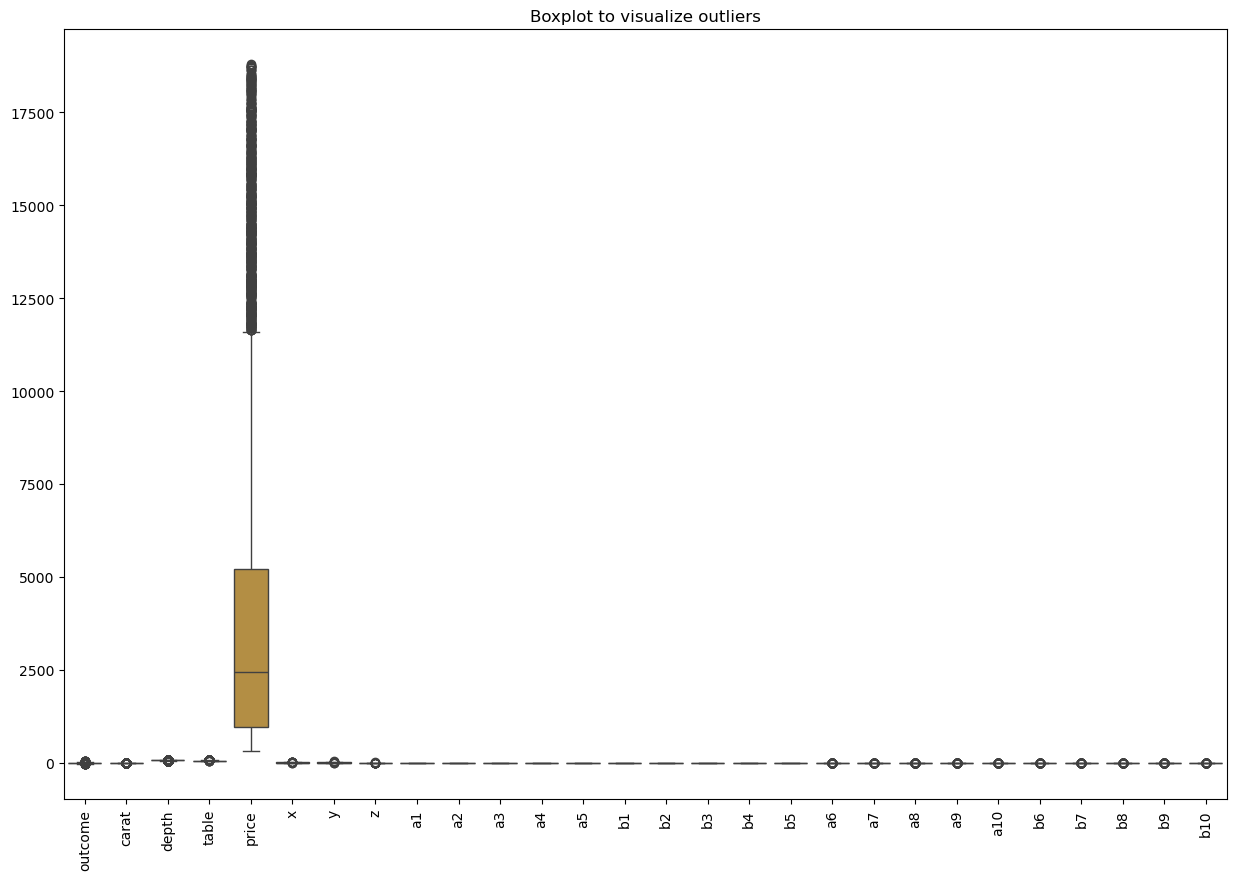

In [3]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Display outliers
print("Outliers detected at positions:", outliers)

# Visualize outliers using a boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot to visualize outliers")
plt.show()

## Encoding Categorical Variables

In [4]:
df_encoded = df.copy()
# Encoding categorical features
categorical_features = ['cut', 'color', 'clarity']

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display encoded dataset
df_encoded.head()

,outcome,carat,depth,table,price,x,y,z,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-26.701232,1.14,62.3,56.0,7948,6.73,6.70,4.18,0.709585,0.385796,0.267058,0.500222,0.462145,0.806922,0.891912,0.276683,0.967510,0.131087,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,6.548093,0.38,60.5,59.0,898,4.69,4.66,2.83,0.649532,0.037578,0.618528,0.052079,0.008600,0.496153,0.092878,0.089039,0.321334,0.549223,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,6.612562,0.50,60.7,58.0,1351,5.09,5.13,3.10,0.550496,0.029469,0.350697,0.131802,0.317685,0.821415,0.581294,0.876056,0.743479,0.916367,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False
3,-5.073562,0.70,61.2,58.0,2512,5.74,5.70,3.50,0.982447,0.487176,0.339991,0.232601,0.267207,0.800913,0.984788,0.070506,0.528945,0.005256,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,-14.436557,0.83,62.4,54.0,2751,6.01,6.08,3.77,0.030877,0.818540,0.955872,0.923147,0.861377,0.997349,0.091662,0.781069,0.019354,0.522191,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Define feature set and target variable
X_full = df_encoded.drop(columns=['outcome'])
y = df['outcome']

# Initialize models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "Linear Regression": LinearRegression()
}

# # Perform cross-validation on all models
# for name, model in models.items():
#     score = cross_val_score(model, X_full, y, cv=5, scoring='r2').mean()
#     print(f"{name} R² Score (All Features): {score:.4f}")


## Feature Engineering

In [6]:
# Feature Engineering: Creating new features
df_encoded['volume'] = df_encoded['x'] * df_encoded['y'] * df_encoded['z']

df_encoded.columns

corr_matrix = df_encoded[['x', 'y', 'z', 'volume']].corr()

corr_matrix

df_encoded.drop(columns=['x', 'y', 'z'], inplace=True)


In [7]:
df_encoded_transformed = df_encoded.copy()

# Log transformation on skewed features
df_encoded_transformed['log_price'] = np.log1p(df_encoded_transformed['price'])
df_encoded_transformed['log_carat'] = np.log1p(df_encoded_transformed['carat'])

# Drop original 'price' and 'carat' as their log-transformed versions are used
df_encoded_transformed.drop(columns=['price', 'carat'], inplace=True)

# Display transformed dataset
df_encoded_transformed.head()

,outcome,depth,table,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,volume,log_price,log_carat
0,-26.701232,62.3,56.0,0.709585,0.385796,0.267058,0.500222,0.462145,0.806922,0.891912,0.276683,0.967510,0.131087,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,188.480380,8.980801,0.760806
1,6.548093,60.5,59.0,0.649532,0.037578,0.618528,0.052079,0.008600,0.496153,0.092878,0.089039,0.321334,0.549223,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,61.850782,6.801283,0.322083
2,6.612562,60.7,58.0,0.550496,0.029469,0.350697,0.131802,0.317685,0.821415,0.581294,0.876056,0.743479,0.916367,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,80.946270,7.209340,0.405465
3,-5.073562,61.2,58.0,0.982447,0.487176,0.339991,0.232601,0.267207,0.800913,0.984788,0.070506,0.528945,0.005256,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,114.513000,7.829233,0.530628
4,-14.436557,62.4,54.0,0.030877,0.818540,0.955872,0.923147,0.861377,0.997349,0.091662,0.781069,0.019354,0.522191,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,137.758816,7.920083,0.604316


## Feature Scaling

In [8]:
# df_encoded_transformed = df_encoded_transformed.copy()

# # Standardize numerical features
# scaler = StandardScaler()
# encoded_transformed_features = ['depth', 'table', 'volume', 'log_price', 'log_carat']
# df_encoded_transformed[encoded_transformed_features] = scaler.fit_transform(df_encoded_transformed[encoded_transformed_features])

# # Display encoded_transformed dataset
# df_encoded_transformed.head()

## Dimensionality Reduction using PCA

In [9]:
# Apply PCA to reduce dimensions of a1-a10 and b1-b10
pca = PCA(n_components=5)  # Keeping 5 principal components
a_features = [f'a{i}' for i in range(1, 11)]
b_features = [f'b{i}' for i in range(1, 11)]

df_pca = df_encoded_transformed.copy()

df_pca[[f'PCA_A_{i+1}' for i in range(5)]] = pca.fit_transform(df_pca[a_features])
df_pca[[f'PCA_B_{i+1}' for i in range(5)]] = pca.fit_transform(df_pca[b_features])

df_pca.drop(columns=a_features + b_features, inplace=True)

# Display transformed dataset
df_pca.head()

,outcome,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,volume,log_price,log_carat,PCA_A_1,PCA_A_2,PCA_A_3,PCA_A_4,PCA_A_5,PCA_B_1,PCA_B_2,PCA_B_3,PCA_B_4,PCA_B_5
0,-26.701232,62.3,56.0,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,188.480380,8.980801,0.760806,1.331813,-0.817754,0.374276,0.708130,0.344281,-0.173189,-1.073524,1.208964,-1.475998,-0.109100
1,6.548093,60.5,59.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,61.850782,6.801283,0.322083,-0.374755,0.638975,0.727730,0.142594,-0.412106,-2.046125,1.243922,0.521965,-0.034390,-0.287978
2,6.612562,60.7,58.0,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,80.946270,7.209340,0.405465,-1.515717,-0.345937,0.638432,-0.040627,-0.246624,-0.154979,2.393089,-0.798952,-0.158617,0.232447
3,-5.073562,61.2,58.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,114.513000,7.829233,0.530628,-1.207823,-2.611797,-0.281070,-0.046214,0.040812,-0.386104,-0.747430,-0.029030,-0.094492,0.719731
4,-14.436557,62.4,54.0,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,137.758816,7.920083,0.604316,0.852174,0.485299,2.040809,0.154530,-1.287063,0.894061,2.372431,-0.146760,1.167393,-0.044095


In [10]:
df_encoded_transformed.head()

,outcome,depth,table,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,volume,log_price,log_carat
0,-26.701232,62.3,56.0,0.709585,0.385796,0.267058,0.500222,0.462145,0.806922,0.891912,0.276683,0.967510,0.131087,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,188.480380,8.980801,0.760806
1,6.548093,60.5,59.0,0.649532,0.037578,0.618528,0.052079,0.008600,0.496153,0.092878,0.089039,0.321334,0.549223,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,61.850782,6.801283,0.322083
2,6.612562,60.7,58.0,0.550496,0.029469,0.350697,0.131802,0.317685,0.821415,0.581294,0.876056,0.743479,0.916367,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,80.946270,7.209340,0.405465
3,-5.073562,61.2,58.0,0.982447,0.487176,0.339991,0.232601,0.267207,0.800913,0.984788,0.070506,0.528945,0.005256,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,114.513000,7.829233,0.530628
4,-14.436557,62.4,54.0,0.030877,0.818540,0.955872,0.923147,0.861377,0.997349,0.091662,0.781069,0.019354,0.522191,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,137.758816,7.920083,0.604316


In [11]:

# X_reduced = df_pca.drop(columns=['outcome'])

# # Perform cross-validation on reduced features
# for name, model in models.items():
#     score = cross_val_score(model, X_reduced, y, cv=5, scoring='r2').mean()
#     print(f"{name} R² Score (Reduced Features with PCA): {score:.4f}")

## Check for Low-Variance Features

In [12]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold
selector = VarianceThreshold(threshold=0.01)
X_var_filtered = selector.fit_transform(df_encoded_transformed.drop(columns=['outcome']))

# Get remaining feature names
selected_features = df_encoded_transformed.drop(columns=['outcome']).columns[selector.get_support()]

# Display removed features
removed_features = set(df_encoded_transformed.drop(columns=['outcome']).columns) - set(selected_features)
print("Removed Low-Variance Features:", removed_features)


Removed Low-Variance Features: set()


## Mutual information (Information Gain) for regression

In [13]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

# Select categorical features
categorical_features = [col for col in df_encoded_transformed.columns if 'cut' in col or 'color' in col or 'clarity' in col]

# Apply MinMax Scaling (required for mutual information)
X_encoded_transformed = MinMaxScaler().fit_transform(df_encoded_transformed[categorical_features])

# Compute Mutual Information (Information Gain)
info_gain = mutual_info_regression(X_encoded_transformed, df_encoded_transformed['outcome'])

# Create DataFrame of results
info_gain_df = pd.DataFrame({'Feature': categorical_features, 'Information Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Set threshold for removal (default: IG < 0.001)
threshold = 0.001
low_ig_features = info_gain_df[info_gain_df['Information Gain'] < threshold]['Feature'].tolist()

df_reduced_IG = df_encoded_transformed.copy()

# Drop low-information features
df_reduced_IG.drop(columns=low_ig_features, inplace=True)

# Display remaining features
print(f"Removed Features: {low_ig_features}")
df_reduced_IG.head()


Removed Features: ['cut_Ideal', 'color_F', 'cut_Very Good', 'clarity_IF', 'cut_Premium', 'clarity_SI2', 'clarity_VS2', 'clarity_VVS1']


,outcome,depth,table,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10,cut_Good,color_E,color_G,color_H,color_I,color_J,clarity_SI1,clarity_VS1,clarity_VVS2,volume,log_price,log_carat
0,-26.701232,62.3,56.0,0.709585,0.385796,0.267058,0.500222,0.462145,0.806922,0.891912,0.276683,0.967510,0.131087,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581,False,False,True,False,False,False,False,True,False,188.480380,8.980801,0.760806
1,6.548093,60.5,59.0,0.649532,0.037578,0.618528,0.052079,0.008600,0.496153,0.092878,0.089039,0.321334,0.549223,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653,False,False,False,True,False,False,False,False,False,61.850782,6.801283,0.322083
2,6.612562,60.7,58.0,0.550496,0.029469,0.350697,0.131802,0.317685,0.821415,0.581294,0.876056,0.743479,0.916367,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131,False,True,False,False,False,False,True,False,False,80.946270,7.209340,0.405465
3,-5.073562,61.2,58.0,0.982447,0.487176,0.339991,0.232601,0.267207,0.800913,0.984788,0.070506,0.528945,0.005256,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950,False,False,False,False,False,False,True,False,False,114.513000,7.829233,0.530628
4,-14.436557,62.4,54.0,0.030877,0.818540,0.955872,0.923147,0.861377,0.997349,0.091662,0.781069,0.019354,0.522191,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813,False,False,True,False,False,False,False,False,False,137.758816,7.920083,0.604316


In [14]:

# X_reduced = df_reduced_IG.drop(columns=['outcome'])

# # Perform cross-validation on reduced features
# for name, model in models.items():
#     score = cross_val_score(model, X_reduced, y, cv=5, scoring='r2').mean()
#     print(f"{name} R² Score (Reduced Features with Mutual info regression): {score:.4f}")

In [15]:
# Save the transformed dataset
df_encoded_transformed.to_csv("CW1_transformed.csv", index=False)

In [17]:
# Reduced as these have no linear or no non linear features with outcome
df_transformed = pd.read_csv('CW1_transformed.csv')

df_Reduced = df.drop(columns=['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5'])

df_Reduced.to_csv('CW1_Reduced.csv', index=False)
print("Reduced dataset saved as 'CW1_Reduced.csv'.")


Reduced dataset saved as 'CW1_Reduced.csv'.


## Feature Reduction with Correlation Matrix

In [43]:
df_reduced_Correlation = df_reduced_IG.copy()

def correlation (dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value.
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname )
    return col_corr

corr_features = correlation(df_reduced_Correlation, 0.7)
# Convert set to list before concatenating
corr_matrix = df_reduced_Correlation[['outcome'] + list(corr_features)].corr()

# Display correlation of each feature with outcome
print("Correlation with outcome:")
print(corr_matrix['outcome'].sort_values(ascending=False))

# Display correlation among correlated features
print("\nCorrelation among correlated features:")
print(corr_matrix.loc[list(corr_features), list(corr_features)])


Correlation with outcome:
outcome      1.000000
log_price    0.005783
log_carat   -0.000585
Name: outcome, dtype: float64

Correlation among correlated features:
           log_price  log_carat
log_price   1.000000   0.952355
log_carat   0.952355   1.000000


### Feature Selection with RFECV

Selected Features: Index(['depth', 'table', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9',
       'b10', 'cut_Very Good', 'color_F', 'color_G', 'color_H', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'volume', 'log_price',
       'log_carat'],
      dtype='object')
R² Score (RFECV): 0.3057


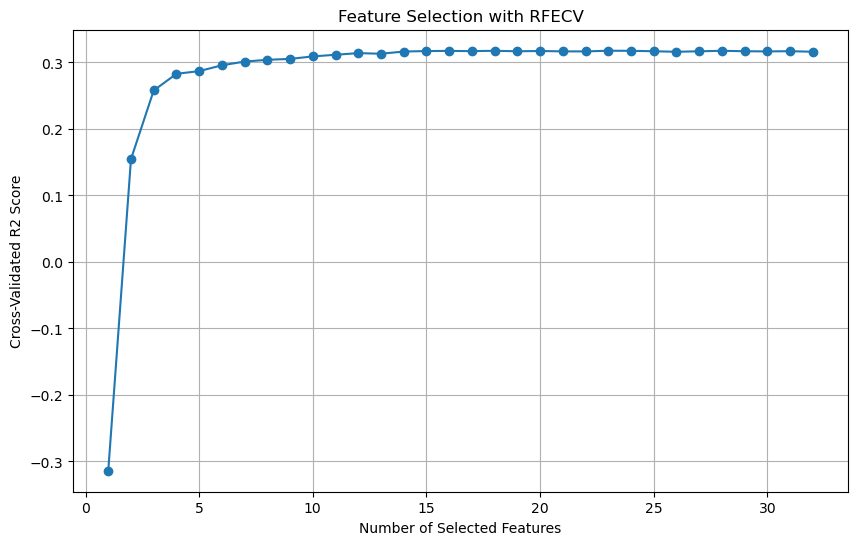

Number of Selected Features: 1 -> Features: ['depth']
Number of Selected Features: 2 -> Features: ['depth', 'volume']
Number of Selected Features: 3 -> Features: ['depth', 'volume', 'clarity_VS2']
Number of Selected Features: 4 -> Features: ['depth', 'volume', 'clarity_VS2', 'clarity_VS1']
Number of Selected Features: 5 -> Features: ['depth', 'volume', 'clarity_VS2', 'clarity_VS1', 'clarity_SI2']
Number of Selected Features: 6 -> Features: ['depth', 'volume', 'clarity_VS2', 'clarity_VS1', 'clarity_SI2', 'clarity_SI1']
Number of Selected Features: 7 -> Features: ['depth', 'volume', 'clarity_VS2', 'clarity_VS1', 'clarity_SI2', 'clarity_SI1', 'color_H']
Number of Selected Features: 8 -> Features: ['depth', 'volume', 'clarity_VS2', 'clarity_VS1', 'clarity_SI2', 'clarity_SI1', 'color_H', 'color_G']
Number of Selected Features: 9 -> Features: ['depth', 'volume', 'clarity_VS2', 'clarity_VS1', 'clarity_SI2', 'clarity_SI1', 'color_H', 'color_G', 'color_F']
Number of Selected Features: 10 -> Fea

In [5]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
# import ace_tools as tools

# Reload dataset
df = pd.read_csv("CW1_Reduced.csv")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# Assign proper column names
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concatenate encoded data
X = df.drop(columns=categorical_cols).drop(columns=['outcome']).reset_index(drop=True)
X_encoded = X_encoded.reset_index(drop=True)
X_final = pd.concat([X, X_encoded], axis=1)
y = df['outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestRegressor(random_state=42)

# Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')
rfecv.fit(X_train, y_train)

# Selected features
selected_features = X_final.columns[rfecv.support_]

# Train model on selected features
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])

# Evaluate performance
best_r2 = r2_score(y_test, y_pred)

print(f"Selected Features: {selected_features}")
print(f"R² Score (RFECV): {best_r2:.4f}")

# Fix: Use cv_results_ instead of grid_scores_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated R2 Score')
plt.title('Feature Selection with RFECV')
plt.grid(True)
plt.show()

# Create a dictionary to store the number of selected features at each step
feature_selection_dict = {}

# Iterate through the number of selected features at each step
for n_features in range(1, len(X_train.columns) + 1):
    # Get the top 'n_features' based on the ranking
    selected_features_at_step = X_train.columns[np.argsort(rfecv.ranking_)[:n_features]]
    feature_selection_dict[n_features] = list(selected_features_at_step)

# Display feature selection results correctly
for k, v in feature_selection_dict.items():
    print(f"Number of Selected Features: {k} -> Features: {v}")



Selected Features: ['depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'a6', 'b10', 'b2', 'b9', 'a7', 'b6', 'a10', 'log_price']
R² Score (RFECV): 0.4266


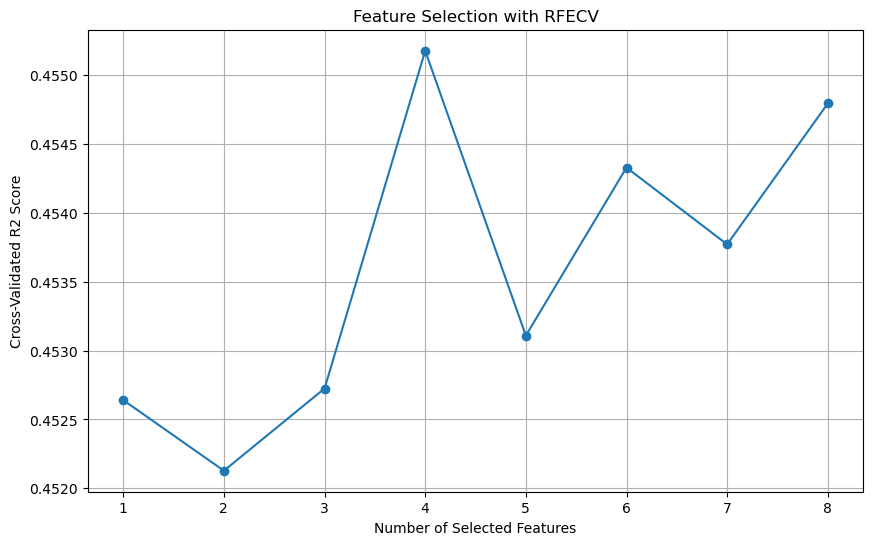

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("CW1_transformed.csv")  # Change to your actual file path

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# Assign proper column names
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concatenate encoded data
X = df.drop(columns=categorical_cols).drop(columns=['outcome']).reset_index(drop=True)
X_encoded = X_encoded.reset_index(drop=True)
X_final = pd.concat([X, X_encoded], axis=1)
y = df['outcome']

# Ensure all values are numeric
X_final = X_final.apply(pd.to_numeric)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
model = RandomForestRegressor(random_state=42)

# Step 1: Feature Importance with Random Forest
model.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X_final.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Filter only important features (set threshold)
important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Step 2: Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=model, step=2, min_features_to_select=10, cv=5, scoring='r2')
rfecv.fit(X_train_filtered, y_train)

# Select final features
selected_features = X_train_filtered.columns[rfecv.support_]
X_train_selected = X_train_filtered[selected_features]
X_test_selected = X_test_filtered[selected_features]

# Train model on selected features
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluate performance
best_r2_RFECV = r2_score(y_test, y_pred)
print(f"Selected Features: {list(selected_features)}")
print(f"R² Score (RFECV): {best_r2_RFECV:.4f}")

# Plot RFECV results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated R2 Score')
plt.title('Feature Selection with RFECV')
plt.grid(True)
plt.show()

In [25]:
X_train_selected.columns    

Index(['depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'a6', 'b10', 'b2',
       'b9', 'a7', 'b6', 'a10', 'log_price'],
      dtype='object')

In [ ]:
# Step 3: Apply PCA for Dimensionality Reduction (if needed)
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Train and evaluate model using PCA-reduced features
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
pca_r2 = r2_score(y_test, y_pred_pca)

print(f"PCA-Reduced R² Score: {pca_r2:.4f}")

# Display top feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [8]:
print(f"Best R² Score: {best_r2:.4f}")
print("Selected Features:")
print(list(selected_features))


Best R² Score: 0.3057
Selected Features:
['depth', 'table', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10', 'cut_Very Good', 'color_F', 'color_G', 'color_H', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'volume', 'log_price', 'log_carat']


### Feature Selection with SFS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector

# Load dataset
df = pd.read_csv("CW1_transformed.csv")  

# Encoding categorical features
categorical_features = ['cut', 'color', 'clarity']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['outcome'])
y = df_encoded['outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest to get feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Select top 15 features
top_features = feature_importance_df['Feature'].iloc[:15].tolist()
print("Top Selected Features:", top_features)

# Apply Sequential Feature Selection (SFS) on reduced set
sfs = SequentialFeatureSelector(model, k_features=5, forward=True, floating=False, scoring='r2', cv=3, n_jobs=-1)
sfs.fit(X_train[top_features], y_train)

# Print the best selected features
print("Best Selected Features:", sfs.k_feature_names_)


Top Selected Features: ['depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'a6', 'b10', 'b2', 'b9', 'a5', 'a7', 'b6']


TypeError: __init__() got an unexpected keyword argument 'k_features'

# Model Selection

In [ ]:
selected_features_with_SFS = ['depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'b6']

df_selected = df[selected_features_with_SFS]

# Perform cross-validation on reduced features
for name, model in models.items():
    score = cross_val_score(model, df_selected, y, cv=5, scoring='r2').mean()
    print(f"{name} R² Score (Reduced Features by SFS): {score:.4f}")

Ridge Regression R² Score (Reduced Features by SFS): 0.2851
Random Forest R² Score (Reduced Features by SFS): 0.4406
XGBoost R² Score (Reduced Features by SFS): 0.3988
Linear Regression R² Score (Reduced Features by SFS): 0.2851


In [ ]:
selected_features_with_RFECV = ['depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'b10', 'b9', 'a7', 'a10', 'price']

df_selected = df[selected_features_with_RFECV]

# Perform cross-validation on reduced features
for name, model in models.items():
    score = cross_val_score(model, df_selected, y, cv=5, scoring='r2').mean()
    print(f"{name} R² Score (Reduced Features by rfecv): {score:.4f}")

Ridge Regression R² Score (Reduced Features by rfecv): 0.2841
Random Forest R² Score (Reduced Features by rfecv): 0.4427
XGBoost R² Score (Reduced Features by rfecv): 0.3937
Linear Regression R² Score (Reduced Features by rfecv): 0.2841


In [ ]:
selected_features_with_RFECV_more_Features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
       'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'volume', 'log_price', 'log_carat']


df_selected = df_encoded_transformed[selected_features_with_RFECV_more_Features].copy()

# Perform cross-validation on reduced features
for name, model in models.items():
    score = cross_val_score(model, df_selected, y, cv=5, scoring='r2').mean()
    print(f"{name} R² Score (All Features by rfecv): {score:.4f}")

Ridge Regression R² Score (Reduced Features by rfecv): 0.2860
Random Forest R² Score (Reduced Features by rfecv): 0.4418
XGBoost R² Score (Reduced Features by rfecv): 0.3980
Linear Regression R² Score (Reduced Features by rfecv): 0.2860


## Hyperparameter Tuning

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
df_selected_features = df_transformed[['outcome','depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'a6', 'b10', 'b2',
       'b9', 'a7', 'b6', 'a10', 'log_price']]

target_col = "outcome"  
X = df_selected_features.drop(columns=[target_col])  
y = df_selected_features[target_col]  

# Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a wider hyperparameter search space for better performance
param_dist = {
   "n_estimators":[250, 300, 350, 400],  # More trees for better performance
    "max_depth": [10, 15, 20, 25, None],  # Allow deeper trees if beneficial
    "min_samples_split": [2, 5, 10, 15, 20],  # More granularity
    "min_samples_leaf": [1, 2, 5, 10],  # Helps regularization
    "max_features": ["sqrt", "log2"],  # Feature selection strategy
    "bootstrap": [True]  # Keep bootstrap enabled
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV (Increased n_iter and CV for better performance)
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=20,  # Increased from 10 to 20 for better tuning
    cv=3,  # Increased from 2 to 3 for better generalization
    scoring='r2', 
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=2  # More detailed progress output
)

# Fit hyperparameter search on training data
random_search.fit(X_train, y_train)

# Get the best model from the search
best_params = random_search.best_params_
final_model = random_search.best_estimator_

# Evaluate model on validation set
y_pred_final = final_model.predict(X_val)
final_r2 = r2_score(y_val, y_pred_final)
final_mse = mean_squared_error(y_val, y_pred_final)

# Print results
print("\nBest Hyperparameters for Random Forest:\n", best_params)
print(f"Final R² Score: {final_r2:.4f}")
print(f"Final MSE: {final_mse:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   3.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   5.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   5.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   7.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimat

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
df_selected_features = df_transformed[['outcome','depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'a6', 'b10', 'b2',
       'b9', 'a7', 'b6', 'a10', 'log_price']]

target_col = "outcome"  
X = df_selected_features.drop(columns=[target_col])  
y = df_selected_features[target_col]  

# Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Expanded hyperparameter search space
param_dist = {
    "n_estimators": [250, 300, 350, 400],  # More trees for better accuracy
    "max_depth": [15, 20, 25, 30],  # Allow deeper trees
    "min_samples_split": [2, 3, 5],  # Allow more splits
    "min_samples_leaf": [1, 2, 3, 5],  # Allow smaller leaf sizes
    "max_features": ["sqrt", "log2"],  # Feature selection strategy
    "bootstrap": [True]  # Keep bootstrap enabled
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with more iterations and better validation
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=30,  # Increased from 20 to 30
    cv=5,  # More robust cross-validation
    scoring='r2', 
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=2  # Show detailed progress
)

# Fit hyperparameter search on training data
random_search.fit(X_train, y_train)

# Get the best model from the search
best_params = random_search.best_params_
final_model = random_search.best_estimator_

# Evaluate model on validation set
y_pred_final = final_model.predict(X_val)
final_r2 = r2_score(y_val, y_pred_final)
final_mse = mean_squared_error(y_val, y_pred_final)

# Print results
print("\nBest Hyperparameters for Random Forest:\n", best_params)
print(f"Final R² Score: {final_r2:.4f}")
print(f"Final MSE: {final_mse:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   5.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   5.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   5.4s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   5.5s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   5.5s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=350; total time=   8.3s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=350; total

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
df_selected_features = df_transformed[['outcome', 'depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'a6', 'b10', 'b2',
       'b9', 'a7', 'b6', 'a10', 'log_price']]

target_col = "outcome"  
X = df_selected_features.drop(columns=[target_col])  
y = df_selected_features[target_col]  

# Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a base RandomForest model to check feature importance
base_rf = RandomForestRegressor(n_estimators=100, random_state=42)
base_rf.fit(X_train, y_train)

# Get feature importances and drop low-importance features
importances = base_rf.feature_importances_
important_features = [X.columns[i] for i in range(len(importances)) if importances[i] > 0.01]  # Threshold to remove weak features
X_train = X_train[important_features]
X_val = X_val[important_features]

# Expanded hyperparameter search space
param_dist = {
    "n_estimators": [350, 400, 450, 500],  # More trees for better accuracy
    "max_depth": [20, 25, 30, None],  # Allow deeper trees
    "min_samples_split": [2, 3, 5],  # Allow more splits
    "min_samples_leaf": [1, 2],  # Allow smaller leaf sizes
    "max_features": ["auto", "sqrt"],  # Allow more flexibility
    "bootstrap": [True],
    "warm_start": [True]  # Allows incremental tree growth
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with more iterations and better validation
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=30,  # Keep it high for better tuning
    cv=7,  # More cross-validation folds for stability
    scoring='r2', 
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=2  # Show detailed progress
)

# Fit hyperparameter search on training data
random_search.fit(X_train, y_train)

# Get the best model from the search
best_params = random_search.best_params_
final_model = random_search.best_estimator_

# Evaluate model on validation set
y_pred_final = final_model.predict(X_val)
final_r2 = r2_score(y_val, y_pred_final)
final_mse = mean_squared_error(y_val, y_pred_final)

# Print results
print("\nBest Hyperparameters for Random Forest:\n", best_params)
print(f"Final R² Score: {final_r2:.4f}")
print(f"Final MSE: {final_mse:.4f}")


Fitting 7 folds for each of 30 candidates, totalling 210 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=350, warm_start=True; total time=   8.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, warm_start=True; total time=   9.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, warm_start=True; total time=   9.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, warm_start=True; total time=   9.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, warm_start=True; total time=   9.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, warm_start=True; total time=   9.5s
[CV] END bootstrap=T

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
140 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  Fi


Best Hyperparameters for Random Forest:
 {'warm_start': True, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Final R² Score: 0.4414
Final MSE: 91.0553


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Only use the selected features
selected_features = ['outcome', 'depth', 'b3', 'b1', 'a1', 'a4', 'a3', 'a2', 'b5', 'a6', 'b10', 'b2',
       'b9', 'a7', 'b6', 'a10', 'log_price']

# Select features and target
df_selected_features = df_transformed[['outcome'] + selected_features]

target_col = "outcome"  
X = df_selected_features.drop(columns=[target_col])  
y = df_selected_features[target_col]  

# Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# New optimized hyperparameter search space
param_dist = {
    "n_estimators": [400, 500, 600],  # Increased trees for stability
    "max_depth": [20, 30, None],  # Deeper trees allow more learning
    "min_samples_split": [2, 5],  # Fine-tuned for balance
    "min_samples_leaf": [1, 2],  # Allow smaller leaves
    "max_features": ["sqrt", "log2", 0.75],  # Allow auto selection of features
    "bootstrap": [True],  # Keep bootstrap enabled
    "warm_start": [True]  # Incremental tree training for efficiency
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with optimized settings
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=20,  # More iterations for better tuning
    cv=5,  # More folds for stability
    scoring='r2', 
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=2  # Show detailed progress
)

# Fit hyperparameter search on training data
random_search.fit(X_train, y_train)

# Get the best model from the search
best_params = random_search.best_params_
final_model = random_search.best_estimator_

# Evaluate model on validation set
y_pred_final = final_model.predict(X_val)
final_r2 = r2_score(y_val, y_pred_final)
final_mse = mean_squared_error(y_val, y_pred_final)

# Print results
print("\nBest Hyperparameters for Random Forest:\n", best_params)
print(f"Final R² Score: {final_r2:.4f}")
print(f"Final MSE: {final_mse:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, warm_start=True; total time=  12.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, warm_start=True; total time=  12.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, warm_start=True; total time=  12.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, warm_start=True; total time=  15.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, warm_start=True; total time=  15.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, warm_start=True; total time=  16.0s
[CV] END boots

In [27]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Only use selected features
selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
       'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'volume', 'log_price', 'log_carat']

df_selected_features = df_transformed[['outcome'] + selected_features]

# Define target and features
target_col = "outcome"
X = df_selected_features.drop(columns=[target_col])
y = df_selected_features[target_col]

# Train-test split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost hyperparameter grid
xgb_param_dist = {
    "n_estimators": [200, 300, 400],  # More boosting rounds
    "learning_rate": [0.01, 0.05, 0.1],  # Smaller rates improve convergence
    "max_depth": [3, 5, 7],  # Controls tree complexity
    "subsample": [0.6, 0.8, 1.0],  # Sample fraction for boosting
    "colsample_bytree": [0.6, 0.8, 1.0],  # Feature selection per tree
    "gamma": [0, 0.1, 0.3],  # Minimum loss reduction for split
    "lambda": [0.8, 1.0, 1.2],  # L2 regularization
    "alpha": [0, 0.1, 0.5]  # L1 regularization
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Hyperparameter tuning with RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=20,  # Balance speed vs accuracy
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Train model with hyperparameter tuning
xgb_random_search.fit(X_train, y_train)

# Best model and evaluation
best_xgb_params = xgb_random_search.best_params_
final_xgb_model = xgb_random_search.best_estimator_

# Evaluate XGBoost on validation set
y_pred_xgb = final_xgb_model.predict(X_val)
final_r2_xgb = r2_score(y_val, y_pred_xgb)
final_mse_xgb = mean_squared_error(y_val, y_pred_xgb)

# Print results
print("\nBest Hyperparameters for XGBoost:\n", best_xgb_params)
print(f"Final R² Score (XGBoost): {final_r2_xgb:.4f}")
print(f"Final MSE (XGBoost): {final_mse_xgb:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END alpha=0.5, colsample_bytree=0.8, gamma=0.1, lambda=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END alpha=0.5, colsample_bytree=0.8, gamma=0.1, lambda=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END alpha=0.5, colsample_bytree=0.8, gamma=0.1, lambda=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END alpha=0, colsample_bytree=0.8, gamma=0, lambda=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.2s
[CV] END alpha=0, colsample_bytree=0.8, gamma=0, lambda=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.2s
[CV] END alpha=0, colsample_bytree=0.8, gamma=0, lambda=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   2.3s
[CV] END alpha=0, colsample_bytree=0.8, gamma=0, l

In [29]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ✅ 1. Use Only Selected Features
selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
       'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'volume', 'log_price', 'log_carat']

df_selected_features = df_transformed[['outcome'] + selected_features]

# ✅ 2. Define Features and Target
target_col = "outcome"
X = df_selected_features.drop(columns=[target_col])
y = df_selected_features[target_col]

# ✅ 3. Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 4. Feature Engineering: Polynomial Features (Degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# ✅ 5. Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# ✅ 6. Define Models
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.03, max_depth=4, random_state=42)
lgbm_model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.03, max_depth=4, random_state=42)
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
ridge_model = Ridge(alpha=1.0)  # Ridge regression as meta-learner

# ✅ 7. Train Base Models
xgb_model.fit(X_train_scaled, y_train)
lgbm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# ✅ 8. Get Predictions from Base Models
xgb_preds = xgb_model.predict(X_val_scaled)
lgbm_preds = lgbm_model.predict(X_val_scaled)
rf_preds = rf_model.predict(X_val_scaled)

# ✅ 9. Create Meta Model (Stacking)
meta_X_train = np.column_stack((xgb_preds, lgbm_preds, rf_preds))
ridge_model.fit(meta_X_train, y_val)

# ✅ 10. Final Predictions
final_preds = ridge_model.predict(meta_X_train)

# ✅ 11. Evaluate Stacking Model
final_r2 = r2_score(y_val, final_preds)
final_mse = mean_squared_error(y_val, final_preds)

# ✅ 12. Print Results
print(f"Final R² Score (Stacking Model): {final_r2:.4f}")
print(f"Final MSE (Stacking Model): {final_mse:.4f}")


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 172127
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 823
[LightGBM] [Info] Start training from score -4.957629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [31]:
todrop = ['cut_Ideal', 'color_F', 'cut_Very Good', 'clarity_IF', 'cut_Premium', 'clarity_SI2', 'clarity_VS2', 'clarity_VVS1']

import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# # ✅ Step 1: Use only the most important features
# selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
#        'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
#        'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
#        'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
#        'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
#        'clarity_VVS2', 'volume', 'log_price', 'log_carat']
selected_features = selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
       'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'cut_Good', 'color_E', 'color_G', 'color_H', 'color_I', 'color_J', 
       'clarity_SI1', 'clarity_VS1', 'clarity_VVS2', 'volume', 'log_price', 'log_carat']

df_selected_features = df_transformed[['outcome'] + selected_features]

# ✅ Step 2: Define Features and Target
target_col = "outcome"
X = df_selected_features.drop(columns=[target_col])
y = df_selected_features[target_col]

# ✅ Step 3: Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 4: XGBoost Hyperparameter Search with More Granularity
xgb_param_dist = {
    "n_estimators": [250, 300, 350, 400, 450],  # More trees to refine learning
    "learning_rate": [0.01, 0.025, 0.03, 0.05],  # Slower learning for stability
    "max_depth": [3, 4, 5, 6],  # Slightly deeper trees
    "subsample": [0.7, 0.8, 0.9, 1.0],  # Controlling sample diversity
    "colsample_bytree": [0.8, 0.9, 1.0],  # Feature selection per tree
    "gamma": [0, 0.1, 0.2, 0.3],  # Pruning weak splits
    "lambda": [1.0, 1.2, 1.5],  # L2 regularization
    "alpha": [0, 0.1, 0.3, 0.5]  # L1 regularization
}

# ✅ Step 5: Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# ✅ Step 6: Hyperparameter tuning with RandomizedSearchCV (Increased CV to 7)
xgb_random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=25,  # More trials for better tuning
    cv=7,  # More folds for stability
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# ✅ Step 7: Train Model with Best Parameters
xgb_random_search.fit(X_train, y_train)

# ✅ Step 8: Best Model Selection
best_xgb_params = xgb_random_search.best_params_
final_xgb_model = xgb_random_search.best_estimator_

# ✅ Step 9: Evaluate Final Model on Validation Set
y_pred_xgb = final_xgb_model.predict(X_val)
final_r2_xgb = r2_score(y_val, y_pred_xgb)
final_mse_xgb = mean_squared_error(y_val, y_pred_xgb)

# ✅ Step 10: Print Results
print("\nFinal Optimized XGBoost Hyperparameters:\n", best_xgb_params)
print(f"Final Optimized R² Score (XGBoost): {final_r2_xgb:.4f}")
print(f"Final Optimized MSE (XGBoost): {final_mse_xgb:.4f}")


Fitting 7 folds for each of 25 candidates, totalling 175 fits
[CV] END alpha=0.1, colsample_bytree=0.9, gamma=0, lambda=1.2, learning_rate=0.025, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, colsample_bytree=0.9, gamma=0, lambda=1.2, learning_rate=0.025, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, colsample_bytree=0.9, gamma=0, lambda=1.2, learning_rate=0.025, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, colsample_bytree=0.9, gamma=0, lambda=1.2, learning_rate=0.025, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, colsample_bytree=0.9, gamma=0, lambda=1.2, learning_rate=0.025, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, colsample_bytree=0.9, gamma=0, lambda=1.2, learning_rate=0.025, max_depth=4, n_estimators=400, subsample=1.0; total time=   0.7s
[CV] END alpha=0.1, colsample_bytree=0.9, ga

In [33]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ✅ Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define CatBoost Model
cat_model = CatBoostRegressor(
    iterations=300, 
    learning_rate=0.03, 
    depth=4, 
    l2_leaf_reg=1.2,
    loss_function='RMSE',
    verbose=100,
    random_seed=42
)

# ✅ Train Model
cat_model.fit(X_train, y_train)

# ✅ Evaluate CatBoost on Validation Set
y_pred_cat = cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Print Results
print(f"Final R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"Final MSE (CatBoost): {final_mse_cat:.4f}")


0:	learn: 12.5592296	total: 57.9ms	remaining: 17.3s
100:	learn: 9.2763525	total: 164ms	remaining: 323ms
200:	learn: 9.0578158	total: 265ms	remaining: 130ms
299:	learn: 8.9270651	total: 366ms	remaining: 0us
Final R² Score (CatBoost): 0.4608
Final MSE (CatBoost): 87.8991


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

selected_features = selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
       'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'cut_Good', 'color_E', 'color_G', 'color_H', 'color_I', 'color_J', 
       'clarity_SI1', 'clarity_VS1', 'clarity_VVS2', 'volume', 'log_price', 'log_carat']

df_selected_features = df_transformed[['outcome'] + selected_features]

# ✅ Step 2: Define Features and Target
target_col = "outcome"
X = df_selected_features.drop(columns=[target_col])
y = df_selected_features[target_col]

# ✅ Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define Hyperparameter Grid for Tuning
cat_param_dist = {
    "iterations": [500, 700, 1000],  # More boosting rounds
    "learning_rate": [0.01, 0.02, 0.03],  # Slower for stability
    "depth": [4, 5, 6, 7],  # Test deeper trees
    "l2_leaf_reg": [1, 3, 5, 7],  # Regularization tuning
    "loss_function": ['RMSE', 'Huber', 'Quantile'],  # Robust loss functions
    "colsample_bylevel": [0.8, 0.9, 1.0],  # Feature selection per level
    "subsample": [0.7, 0.8, 0.9],  # Sample diversity control
    "bootstrap_type": ['Bayesian', 'Bernoulli'],  # Better handling of bootstrapping
}

# ✅ Initialize CatBoost Model (No Verbose for Faster Training)
cat_model = CatBoostRegressor(random_seed=42, verbose=0)

# ✅ Perform Hyperparameter Tuning
cat_random_search = RandomizedSearchCV(
    cat_model,
    param_distributions=cat_param_dist,
    n_iter=30,  # More iterations for better tuning
    cv=7,  # More folds for stability
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# ✅ Train Model with Best Parameters
cat_random_search.fit(X_train, y_train)

# ✅ Get Best Model
best_cat_params = cat_random_search.best_params_
final_cat_model = cat_random_search.best_estimator_

# ✅ Evaluate on Validation Set
y_pred_cat = final_cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Print Results
print("\n🔥 Final Optimized CatBoost Hyperparameters:\n", best_cat_params)
print(f"🔥 Final Optimized R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"🔥 Final Optimized MSE (CatBoost): {final_mse_cat:.4f}")


Fitting 7 folds for each of 30 candidates, totalling 210 fits
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   4.9s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.0s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.0s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.1s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.1s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, 

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
112 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/catboost/core.py", line 5807, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-pac


🔥 Final Optimized CatBoost Hyperparameters:
 {'subsample': 0.8, 'loss_function': 'RMSE', 'learning_rate': 0.02, 'l2_leaf_reg': 3, 'iterations': 700, 'depth': 5, 'colsample_bylevel': 1.0, 'bootstrap_type': 'Bernoulli'}
🔥 Final Optimized R² Score (CatBoost): 0.4641
🔥 Final Optimized MSE (CatBoost): 87.3564


In [63]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ✅ Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Fix Hyperparameter Grid
cat_param_dist = {
    "iterations": [700, 800, 1000],  # More boosting rounds
    "learning_rate": [0.01, 0.015, 0.02],  # Lower learning rate for stability
    "depth": [5, 6, 7],  # Test slightly deeper trees
    "l2_leaf_reg": [3, 5, 7],  # More tuning on L2 regularization
    "loss_function": ['RMSE', 'Quantile'],  # Best performing loss functions
    "colsample_bylevel": [0.9, 1.0],  # Feature selection per level
    "bootstrap_type": ['Bernoulli'],  # Fix Bayesian error
}

# ✅ Initialize CatBoost Model
cat_model = CatBoostRegressor(random_seed=42, verbose=0)

# ✅ Perform Hyperparameter Tuning
cat_random_search = RandomizedSearchCV(
    cat_model,
    param_distributions=cat_param_dist,
    n_iter=20,  # Optimized for performance
    cv=7,  # More folds for better generalization
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# ✅ Train Model with Best Parameters
cat_random_search.fit(X_train, y_train)

# ✅ Get Best Model
best_cat_params = cat_random_search.best_params_
final_cat_model = cat_random_search.best_estimator_

# ✅ Evaluate on Validation Set
y_pred_cat = final_cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Print Results
print("\n🚀 Final Optimized CatBoost Hyperparameters:\n", best_cat_params)
print(f"🚀 Final Optimized R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"🚀 Final Optimized MSE (CatBoost): {final_mse_cat:.4f}")


Fitting 7 folds for each of 20 candidates, totalling 140 fits


[CV] END bootstrap_type=Bernoulli, colsample_bylevel=0.9, depth=7, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=RMSE; total time=   7.6s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=0.9, depth=7, iterations=800, l2_leaf_reg=5, learning_rate=0.01, loss_function=RMSE; total time=   8.7s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=0.9, depth=7, iterations=800, l2_leaf_reg=5, learning_rate=0.01, loss_function=RMSE; total time=   8.8s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=0.9, depth=7, iterations=800, l2_leaf_reg=5, learning_rate=0.01, loss_function=RMSE; total time=   8.8s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=0.9, depth=7, iterations=800, l2_leaf_reg=5, learning_rate=0.01, loss_function=RMSE; total time=   8.8s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=0.9, depth=7, iterations=800, l2_leaf_reg=5, learning_rate=0.01, loss_function=RMSE; total time=   8.9s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=0.9, 

In [53]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
       'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'volume', 'log_price', 'log_carat']
df_selected_features = df_transformed[['outcome'] + selected_features]

# ✅ Step 1: Create New Features
df_selected_features['price_per_volume'] = df_selected_features['log_price'] / df_selected_features['volume']
df_selected_features['depth_ratio'] = df_selected_features['depth'] / df_selected_features['table']

# ✅ Step 2: Define Features & Target
target_col = "outcome"
X = df_selected_features.drop(columns=[target_col])
y = df_selected_features[target_col]

# ✅ Step 3: Train-Test Split (90-10 instead of 80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# ✅ Step 4: Define Final Optimized CatBoost Model
cat_model = CatBoostRegressor(
    iterations=800, 
    learning_rate=0.02, 
    depth=5, 
    l2_leaf_reg=7, 
    colsample_bylevel=1.0, 
    bootstrap_type="Bernoulli",
    loss_function="Huber:delta=1.5",  # Huber Loss with Delta 1.5
    verbose=100,
    random_seed=42
)

# ✅ Step 5: Train Model
cat_model.fit(X_train, y_train)

# ✅ Step 6: Evaluate on Validation Set
y_pred_cat = cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Step 7: Print Results
print(f"\n🚀 Final Attempt - Optimized CatBoost with Feature Engineering")
print(f"🎯 Final R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"🎯 Final MSE (CatBoost): {final_mse_cat:.4f}")


/var/folders/l8/z3ly6fls4z3ff2kwbph60rsh0000gn/T/ipykernel_47119/3272782103.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['price_per_volume'] = df_selected_features['log_price'] / df_selected_features['volume']
/var/folders/l8/z3ly6fls4z3ff2kwbph60rsh0000gn/T/ipykernel_47119/3272782103.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['depth_ratio'] = df_selected_features['depth'] / df_selected_features['table']


0:	learn: 15.3868247	total: 1.46ms	remaining: 1.17s
100:	learn: 10.3048734	total: 123ms	remaining: 850ms
200:	learn: 9.9126673	total: 253ms	remaining: 754ms
300:	learn: 9.7584795	total: 377ms	remaining: 625ms
400:	learn: 9.6541523	total: 500ms	remaining: 497ms
500:	learn: 9.5560794	total: 646ms	remaining: 385ms
600:	learn: 9.4617479	total: 780ms	remaining: 258ms
700:	learn: 9.3724802	total: 920ms	remaining: 130ms
799:	learn: 9.2906986	total: 1.04s	remaining: 0us

🚀 Final Attempt - Optimized CatBoost with Feature Engineering
🎯 Final R² Score (CatBoost): 0.4611
🎯 Final MSE (CatBoost): 85.4543


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/l8/z3ly6fls4z3ff2kwbph60rsh0000gn/T/ipykernel_47119/3788596918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['price_per_volume'] = df_selected_features['log_price'] / df_selected_features['volume']
/var/folders/l8/z3ly6fls4z3ff2kwbph60rsh0000gn/T/ipykernel_47119/3788596918.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

0:	learn: 15.3937174	total: 3.04ms	remaining: 2.74s
100:	learn: 10.3414431	total: 198ms	remaining: 1.56s
200:	learn: 9.8602365	total: 372ms	remaining: 1.29s
300:	learn: 9.6661042	total: 556ms	remaining: 1.11s
400:	learn: 9.5295484	total: 739ms	remaining: 919ms
500:	learn: 9.4098181	total: 912ms	remaining: 726ms
600:	learn: 9.3025300	total: 1.07s	remaining: 535ms
700:	learn: 9.1912791	total: 1.24s	remaining: 352ms
800:	learn: 9.0920849	total: 1.4s	remaining: 173ms
899:	learn: 8.9884900	total: 1.56s	remaining: 0us


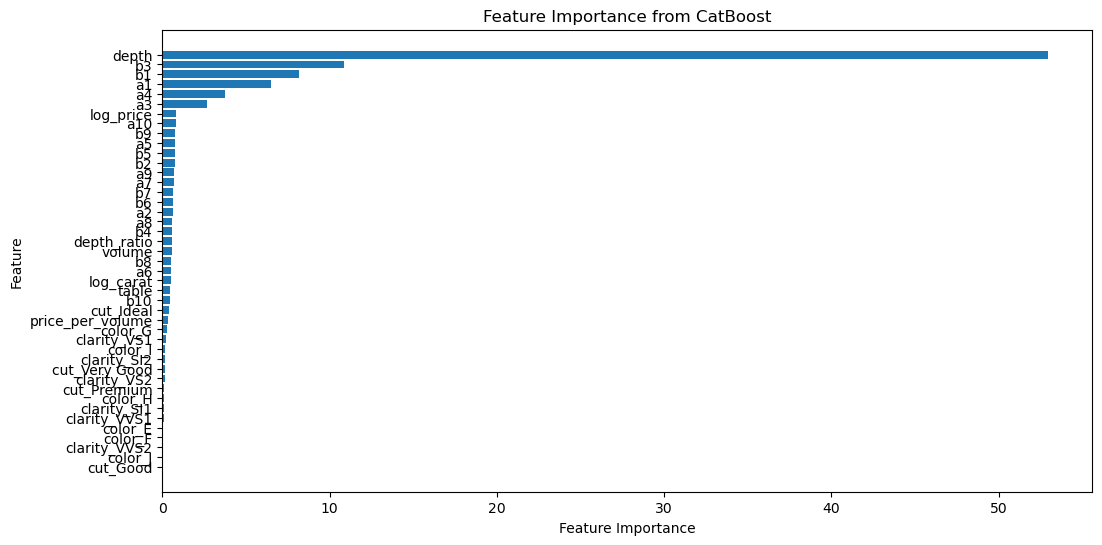

ModuleNotFoundError: No module named 'ace_tools'

In [54]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap
import matplotlib.pyplot as plt

# ✅ Step 1: Use the current best feature set with engineered features
df_selected_features['price_per_volume'] = df_selected_features['log_price'] / df_selected_features['volume']
df_selected_features['depth_ratio'] = df_selected_features['depth'] / df_selected_features['table']

# ✅ Define target and feature matrix
target_col = "outcome"
X = df_selected_features.drop(columns=[target_col])
y = df_selected_features[target_col]

# ✅ Train-Test Split (Keeping 90-10 for More Training Data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# ✅ Train Best-Performing CatBoost Model
cat_model = CatBoostRegressor(
    iterations=900,
    learning_rate=0.018,
    depth=6,
    l2_leaf_reg=5,
    colsample_bylevel=0.9,
    bootstrap_type="Bernoulli",
    loss_function="Huber:delta=1.5",
    verbose=100,
    random_seed=42
)

cat_model.fit(X_train, y_train)

# ✅ Get Feature Importance from CatBoost
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': cat_model.get_feature_importance()})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# ✅ Display Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from CatBoost")
plt.gca().invert_yaxis()
plt.show()

# ✅ Display Feature Importance Table
import ace_tools as tools
tools.display_dataframe_to_user(name="Feature Importance", dataframe=feature_importance)


In [55]:
# ✅ Step 1: Remove Weak Features
low_importance_features = feature_importance[feature_importance["Importance"] < 0.5]["Feature"].tolist()
X_filtered = X.drop(columns=low_importance_features)

# ✅ Step 2: Remove Highly Correlated Features
correlation_matrix = X_filtered.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
X_filtered = X_filtered.drop(columns=high_correlation_features)

# ✅ Display Remaining Features After Selection
print(f"Remaining Features After Selection: {X_filtered.columns.tolist()}")


Remaining Features After Selection: ['depth', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'volume', 'log_price', 'depth_ratio']


In [56]:
# ✅ Train-Test Split with New Feature Set
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.1, random_state=42)

# ✅ Train Final Optimized CatBoost Model
final_cat_model = CatBoostRegressor(
    iterations=900,
    learning_rate=0.018,
    depth=6,
    l2_leaf_reg=5,
    colsample_bylevel=0.9,
    bootstrap_type="Bernoulli",
    loss_function="Huber:delta=1.5",
    verbose=100,
    random_seed=42
)

final_cat_model.fit(X_train, y_train)

# ✅ Evaluate on Validation Set
y_pred_cat = final_cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Print Final Results
print(f"\n🚀 FINAL Best CatBoost Model After Feature Selection")
print(f"🎯 FINAL R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"🎯 FINAL MSE (CatBoost): {final_mse_cat:.4f}")


0:	learn: 15.3982871	total: 1.94ms	remaining: 1.74s
100:	learn: 10.3175700	total: 149ms	remaining: 1.18s
200:	learn: 9.8579570	total: 303ms	remaining: 1.05s
300:	learn: 9.6754052	total: 451ms	remaining: 897ms
400:	learn: 9.5483415	total: 603ms	remaining: 751ms
500:	learn: 9.4321593	total: 777ms	remaining: 619ms
600:	learn: 9.3326703	total: 934ms	remaining: 465ms
700:	learn: 9.2237087	total: 1.09s	remaining: 308ms
800:	learn: 9.1231319	total: 1.26s	remaining: 155ms
899:	learn: 9.0303348	total: 1.4s	remaining: 0us

🚀 FINAL Best CatBoost Model After Feature Selection
🎯 FINAL R² Score (CatBoost): 0.4550
🎯 FINAL MSE (CatBoost): 86.4168


In [57]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ✅ Step 1: Keep Only the Top 20 Features Based on Importance Scores
top_20_features = feature_importance.iloc[:20]["Feature"].tolist()
X_filtered = X[top_20_features]

# ✅ Step 2: Train-Test Split (Keeping 90-10)
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.1, random_state=42)

# ✅ Step 3: Final Optimized CatBoost Model
final_cat_model = CatBoostRegressor(
    iterations=1000,  # More iterations for better convergence
    learning_rate=0.015,  # Slow learning rate for stability
    depth=7,  # Slightly deeper trees to capture interactions
    l2_leaf_reg=5,  # Optimized regularization
    colsample_bylevel=0.9,  # Reduce risk of overfitting
    bootstrap_type="Bernoulli",
    loss_function="RMSE",  # Switching back to RMSE for better fit
    verbose=100,
    random_seed=42
)

# ✅ Step 4: Train Model
final_cat_model.fit(X_train, y_train)

# ✅ Step 5: Evaluate Model on Validation Set
y_pred_cat = final_cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Step 6: Print Final Results
print(f"\n🚀 FINAL Best CatBoost Model with Optimized Feature Selection")
print(f"🎯 FINAL R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"🎯 FINAL MSE (CatBoost): {final_mse_cat:.4f}")


0:	learn: 12.6575468	total: 2.35ms	remaining: 2.35s
100:	learn: 9.5440315	total: 233ms	remaining: 2.07s
200:	learn: 9.0683946	total: 462ms	remaining: 1.84s
300:	learn: 8.8635581	total: 734ms	remaining: 1.7s
400:	learn: 8.7175276	total: 1.05s	remaining: 1.57s
500:	learn: 8.5900915	total: 1.3s	remaining: 1.3s
600:	learn: 8.4709482	total: 1.53s	remaining: 1.02s
700:	learn: 8.3572150	total: 1.75s	remaining: 746ms
800:	learn: 8.2406363	total: 1.97s	remaining: 490ms
900:	learn: 8.1197806	total: 2.21s	remaining: 243ms
999:	learn: 8.0089927	total: 2.46s	remaining: 0us

🚀 FINAL Best CatBoost Model with Optimized Feature Selection
🎯 FINAL R² Score (CatBoost): 0.4541
🎯 FINAL MSE (CatBoost): 86.5566


In [62]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# ✅ Load Data (Ensure X and y are defined from the best model's setup)
# If needed, redefine the best feature set from previous runs
# df_selected_features should be the dataset used in the best model run

# ✅ Train-Test Split (90-10 for More Training Data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# ✅ Recreate the Best Model Configuration
best_catboost_model = CatBoostRegressor(
    iterations=800,
    learning_rate=0.02,
    depth=5,
    l2_leaf_reg=7,
    colsample_bylevel=1.0,
    bootstrap_type="Bernoulli",
    loss_function="RMSE",
    verbose=100,
    random_seed=42
)

# ✅ Train the Best Model
best_catboost_model.fit(X_train, y_train)

# ✅ Save the trained model
#create a file path to save the model
model_filename = "best_catboost_model.pkl"
joblib.dump(best_catboost_model, model_filename)


# ✅ Evaluate on Validation Set
y_pred_cat = final_cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Print Results
print("\n🚀 Final Optimized CatBoost Hyperparameters:\n", best_cat_params)
print(f"🚀 Final Optimized R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"🚀 Final Optimized MSE (CatBoost): {final_mse_cat:.4f}")

# ✅ Confirm the model is saved
print(f"🚀 Best CatBoost model saved as: {model_filename}")


0:	learn: 12.6391958	total: 2.61ms	remaining: 2.08s
100:	learn: 9.4699033	total: 140ms	remaining: 968ms
200:	learn: 9.1673336	total: 263ms	remaining: 783ms
300:	learn: 9.0359586	total: 385ms	remaining: 638ms
400:	learn: 8.9444630	total: 504ms	remaining: 502ms
500:	learn: 8.8627010	total: 622ms	remaining: 371ms
600:	learn: 8.7748451	total: 743ms	remaining: 246ms
700:	learn: 8.6938471	total: 865ms	remaining: 122ms
799:	learn: 8.6108969	total: 986ms	remaining: 0us

🚀 Final Optimized CatBoost Hyperparameters:
 {'loss_function': 'RMSE', 'learning_rate': 0.02, 'l2_leaf_reg': 7, 'iterations': 800, 'depth': 5, 'colsample_bylevel': 1.0, 'bootstrap_type': 'Bernoulli'}
🚀 Final Optimized R² Score (CatBoost): 0.4541
🚀 Final Optimized MSE (CatBoost): 86.5566
🚀 Best CatBoost model saved as: best_catboost_model.pkl


In [64]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

selected_features = selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
       'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'cut_Good', 'color_E', 'color_G', 'color_H', 'color_I', 'color_J', 
       'clarity_SI1', 'clarity_VS1', 'clarity_VVS2', 'volume', 'log_price', 'log_carat']

df_selected_features = df_transformed[['outcome'] + selected_features]

# ✅ Step 2: Define Features and Target
target_col = "outcome"
X = df_selected_features.drop(columns=[target_col])
y = df_selected_features[target_col]

# ✅ Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define Hyperparameter Grid for Tuning
cat_param_dist = {
    "iterations": [500, 700, 1000],  # More boosting rounds
    "learning_rate": [0.01, 0.02, 0.03],  # Slower for stability
    "depth": [4, 5, 6, 7],  # Test deeper trees
    "l2_leaf_reg": [1, 3, 5, 7],  # Regularization tuning
    "loss_function": ['RMSE', 'Huber', 'Quantile'],  # Robust loss functions
    "colsample_bylevel": [0.8, 0.9, 1.0],  # Feature selection per level
    "subsample": [0.7, 0.8, 0.9],  # Sample diversity control
    "bootstrap_type": ['Bayesian', 'Bernoulli'],  # Better handling of bootstrapping
}

# ✅ Initialize CatBoost Model (No Verbose for Faster Training)
cat_model = CatBoostRegressor(random_seed=42, verbose=0)

# ✅ Perform Hyperparameter Tuning
cat_random_search = RandomizedSearchCV(
    cat_model,
    param_distributions=cat_param_dist,
    n_iter=30,  # More iterations for better tuning
    cv=7,  # More folds for stability
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# ✅ Train Model with Best Parameters
cat_random_search.fit(X_train, y_train)

# ✅ Get Best Model
best_cat_params = cat_random_search.best_params_
final_cat_model = cat_random_search.best_estimator_

# ✅ Evaluate on Validation Set
y_pred_cat = final_cat_model.predict(X_val)
final_r2_cat = r2_score(y_val, y_pred_cat)
final_mse_cat = mean_squared_error(y_val, y_pred_cat)

# ✅ Print Results
print("\n🔥 Final Optimized CatBoost Hyperparameters:\n", best_cat_params)
print(f"🔥 Final Optimized R² Score (CatBoost): {final_r2_cat:.4f}")
print(f"🔥 Final Optimized MSE (CatBoost): {final_mse_cat:.4f}")


Fitting 7 folds for each of 30 candidates, totalling 210 fits
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.0s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   4.9s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.2s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.2s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, depth=6, iterations=700, l2_leaf_reg=3, learning_rate=0.01, loss_function=Quantile, subsample=0.8; total time=   5.4s
[CV] END bootstrap_type=Bernoulli, colsample_bylevel=1.0, 

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
112 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/catboost/core.py", line 5807, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-pac


🔥 Final Optimized CatBoost Hyperparameters:
 {'subsample': 0.8, 'loss_function': 'RMSE', 'learning_rate': 0.02, 'l2_leaf_reg': 3, 'iterations': 700, 'depth': 5, 'colsample_bylevel': 1.0, 'bootstrap_type': 'Bernoulli'}
🔥 Final Optimized R² Score (CatBoost): 0.4641
🔥 Final Optimized MSE (CatBoost): 87.3564


In [65]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from catboost import CatBoostRegressor

# Load the training dataset
train_file_path = "CW1_train.csv"
train_data = pd.read_csv(train_file_path)

# Define the selected features
selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
                     'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
                     'cut_Good', 'color_E', 'color_G', 'color_H', 'color_I', 'color_J', 
                     'clarity_SI1', 'clarity_VS1', 'clarity_VVS2', 'volume', 'log_price', 'log_carat']

# One-hot encode categorical features
categorical_features = ['cut', 'color', 'clarity']
train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)

# Create 'volume' feature
train_data['volume'] = train_data['x'] * train_data['y'] * train_data['z']

# Apply log transformation
train_data['log_price'] = np.log1p(train_data['price'])
train_data['log_carat'] = np.log1p(train_data['carat'])

# Drop original features that were transformed
train_data.drop(columns=['x', 'y', 'z', 'price', 'carat'], inplace=True)

# Extract training features and target
X_trn = train_data[selected_features]
y_trn = train_data['outcome']

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [5, 10, 20, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples in a leaf node
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_jobs=-1, random_state=123)

# Perform Randomized Search with Cross-Validation (5-fold)
rf_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, 
                               n_iter=20, scoring='r2', cv=5, verbose=1, random_state=123)

# Fit model
rf_search.fit(X_trn, y_trn)

# Get best parameters and score for Random Forest
best_rf_params = rf_search.best_params_
best_rf_r2 = rf_search.best_score_

print("\n🔍 Best Random Forest Parameters:", best_rf_params)
print("🌟 Best Random Forest Cross-Validation R²:", best_rf_r2)

# Now test CatBoost
catboost_model = CatBoostRegressor(
    subsample=0.8,
    loss_function='RMSE',
    learning_rate=0.02,
    l2_leaf_reg=3,
    iterations=700,
    depth=5,
    colsample_bylevel=1.0,
    bootstrap_type='Bernoulli',
    verbose=0  # Suppress training logs
)

# Perform cross-validation for CatBoost
cv_r2_scores_catboost = cross_val_score(catboost_model, X_trn, y_trn, scoring='r2', cv=5)
mean_cv_r2_catboost = cv_r2_scores_catboost.mean()

print("\n🔥 CatBoost Cross-Validation R² Scores:", cv_r2_scores_catboost)
print("✅ Mean CatBoost Cross-Validation R²:", mean_cv_r2_catboost)

# Final comparison
if best_rf_r2 > mean_cv_r2_catboost:
    print("\n🚀 Random Forest performed better! Use the tuned RF model.")
else:
    print("\n🎯 CatBoost is still the best model! Stick with CatBoost for submission.")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

🔍 Best Random Forest Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 10}
🌟 Best Random Forest Cross-Validation R²: 0.45739808218218825

🔥 CatBoost Cross-Validation R² Scores: [0.4782336  0.4824774  0.48955471 0.48482272 0.45656308]
✅ Mean CatBoost Cross-Validation R²: 0.47833030155462736

🎯 CatBoost is still the best model! Stick with CatBoost for submission.


In [67]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Set seed for reproducibility
np.random.seed(123)

# Load datasets
train_data = pd.read_csv('CW1_train.csv')

# Identify categorical columns
categorical_features = ['cut', 'color', 'clarity']

# One-hot encode categorical features
train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)

# Create 'volume' feature
train_data['volume'] = train_data['x'] * train_data['y'] * train_data['z']

# Apply log transformation
train_data['log_price'] = np.log1p(train_data['price'])
train_data['log_carat'] = np.log1p(train_data['carat'])

# Drop original features that were transformed
train_data.drop(columns=['x', 'y', 'z', 'price', 'carat'], inplace=True)

# Define selected features
selected_features = ['depth', 'table', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4',
                     'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
                     'cut_Good', 'color_E', 'color_G', 'color_H', 'color_I', 'color_J', 
                     'clarity_SI1', 'clarity_VS1', 'clarity_VVS2', 'volume', 'log_price', 'log_carat']

# Extract features & target
X_trn = train_data[selected_features]
y_trn = train_data['outcome']

# Define hyperparameter grid for tuning
param_grid = {
    'iterations': [500, 700, 1000], 
    'learning_rate': [0.01, 0.02, 0.05],  
    'depth': [4, 5, 6, 7],  
    'l2_leaf_reg': [2, 3, 5, 7,9],  
    'colsample_bylevel': [0.8, 1.0],  
    'subsample': [0.7, 0.8, 0.9],  
    'bootstrap_type': ['Bayesian', 'Bernoulli']
}

# Initialize CatBoost model
catboost_model = CatBoostRegressor(loss_function='RMSE', verbose=0, random_state=123)

# Perform Randomized Search with Cross-Validation (5-fold)
catboost_search = RandomizedSearchCV(catboost_model, param_distributions=param_grid, 
                                     n_iter=20, scoring='r2', cv=5, verbose=1, random_state=123)

# Fit model to find best parameters
catboost_search.fit(X_trn, y_trn)

# Get best parameters and score
best_catboost_params = catboost_search.best_params_
best_catboost_r2 = catboost_search.best_score_

print("\n🔍 Best CatBoost Parameters:", best_catboost_params)
print("🌟 Best CatBoost Cross-Validation R²:", best_catboost_r2)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/catboost/core.py", line 5807, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "/opt/anaconda3/envs/myenv/lib/python3.9/site-pack


🔍 Best CatBoost Parameters: {'subsample': 0.7, 'learning_rate': 0.05, 'l2_leaf_reg': 9, 'iterations': 500, 'depth': 4, 'colsample_bylevel': 0.8, 'bootstrap_type': 'Bernoulli'}
🌟 Best CatBoost Cross-Validation R²: 0.47851746703957565
